In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("shopping_trends_updated.csv")
data


,Customer ID,Age,Gender,Item_Purchased,Category,PurchaseAmount(USD),Location,Size,Color,Season,Review_Rating,Subscription Status,ShippingType,Discount Applied,Promo Code Used,PreviousPurchases,PaymentMethod,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [4]:
data.columns



Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
data.shape

(3900, 18)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item_Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   PurchaseAmount(USD)     3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review_Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  ShippingType            3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
data.isnull().sum()


Customer ID               0
Age                       0
Gender                    0
Item_Purchased            0
Category                  0
PurchaseAmount(USD)       0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Subscription Status       0
ShippingType              0
Discount Applied          0
Promo Code Used           0
PreviousPurchases         0
PaymentMethod             0
Frequency_of_Purchases    0
Age_Group                 0
dtype: int64

In [10]:
data.duplicated().sum()

0

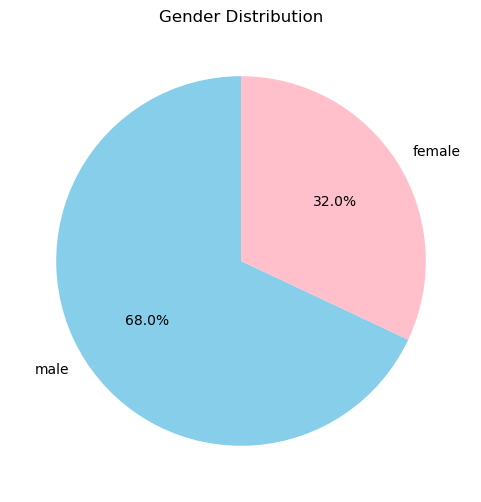

In [13]:
# count of gender
gender_counts = data[['Gender']].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle = 90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.show()

In [42]:
# creating a cross tabulation
cross_tab = pd.crosstab(data['Gender'], data['Item_Purchased'])
print(cross_tab)

Item_Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Gender                                                                        
Female                37    55      66     50    47     52      37       58   
Male                 106   106     105     94   114    114     103       95   

Item_Purchased  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Gender                       ...                                       
Female           52      51  ...     45     59     48      48     49   
Male            102     100  ...    112    110    102     109    109   

Item_Purchased  Sneakers  Socks  Sunglasses  Sweater  T-shirt  
Gender                                                         
Female                42     58          56       50       46  
Male                 103    101         105      114      101  

[2 rows x 25 columns]


      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [45]:
# counts of items by Gender
Counts_of_items_gender = data.groupby('Gender')['Item_Purchased'].value_counts()
Counts_of_items_gender


Gender  Item_Purchased
Female  Blouse             66
        Sandals            59
        Shirt              59
        Handbag            58
        Socks              58
        Sunglasses         56
        Belt               55
        Jacket             54
        Dress              52
        Hat                52
        Jewelry            52
        Hoodie             51
        Boots              50
        Sweater            50
        Skirt              49
        Pants              48
        Shoes              48
        Shorts             48
        Coat               47
        T-shirt            46
        Scarf              45
        Sneakers           42
        Backpack           37
        Gloves             37
        Jeans              29
Male    Pants             123
        Jewelry           119
        Coat              114
        Dress             114
        Sweater           114
        Scarf             112
        Shirt             110
        Jacket   

In [48]:
# Counts of categories
category_counts = data['Category'].value_counts()
category_counts

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

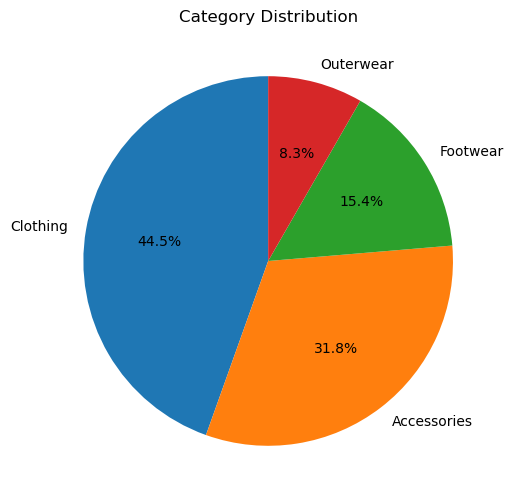

In [56]:
# bar chart of categories
plt.figure(figsize=(8,6))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Category Distribution')
plt.show()

<Figure size 800x600 with 0 Axes>

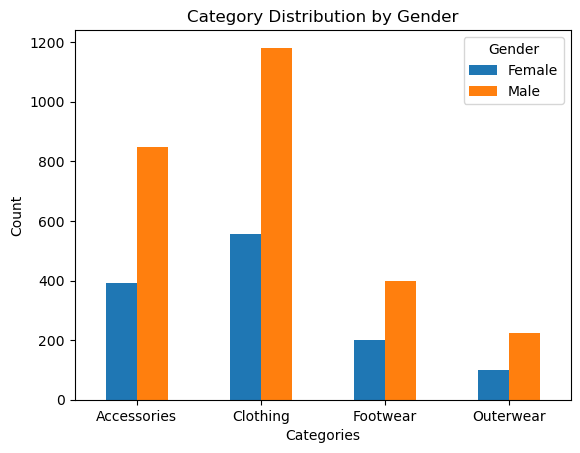

In [54]:
cat_counts = data.groupby('Category')['Gender'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(8,6))
cat_counts.plot(kind = 'bar', stacked = False)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Distribution by Gender')
plt.xticks(rotation=0)
plt.legend(title = 'Gender')
plt.show()

In [3]:
item_counts = data['Item_Purchased'].value_counts()
item_counts

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item_Purchased, dtype: int64

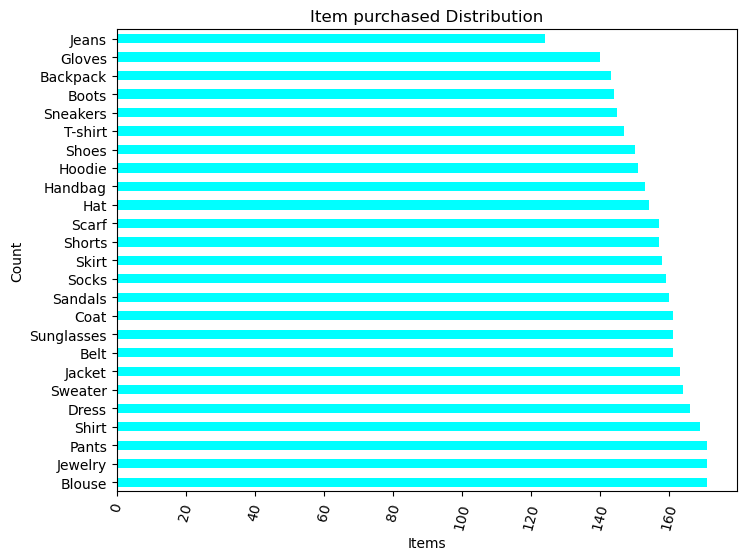

In [9]:
plt.figure(figsize=(8,6))
item_counts.plot(kind = 'barh', color='cyan')
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Item purchased Distribution')
plt.xticks(rotation=75)
plt.show()

In [10]:
location_count = data['Location'].value_counts()
location_count

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

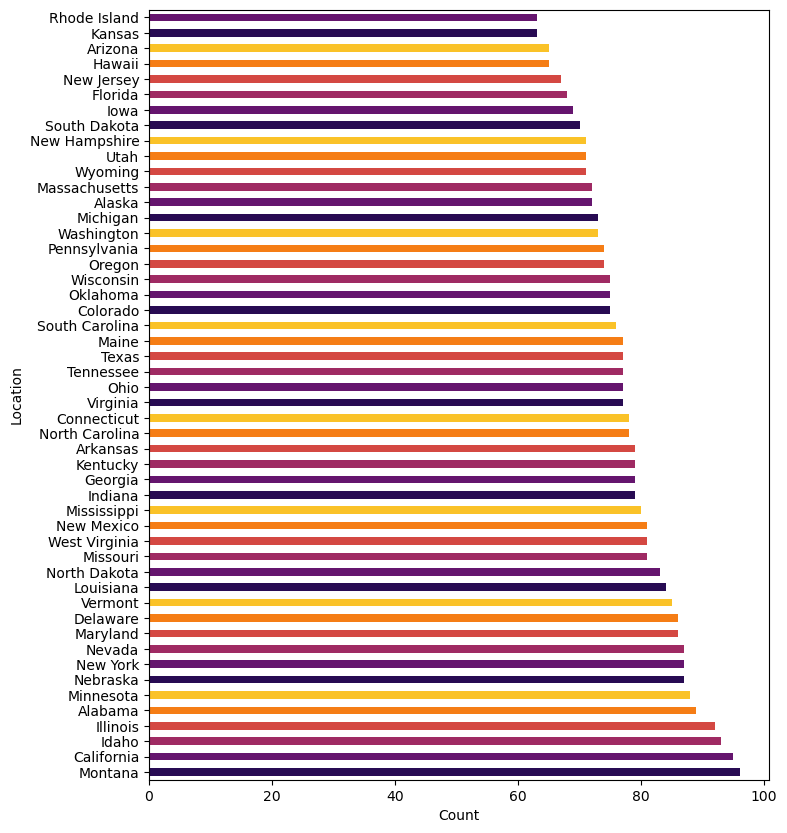

In [14]:
plt.figure(figsize=(8,10))
location_count.plot(kind='barh', color = sns.color_palette('inferno'))
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [18]:
Season_counts = data['Season'].value_counts()
Season_counts

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

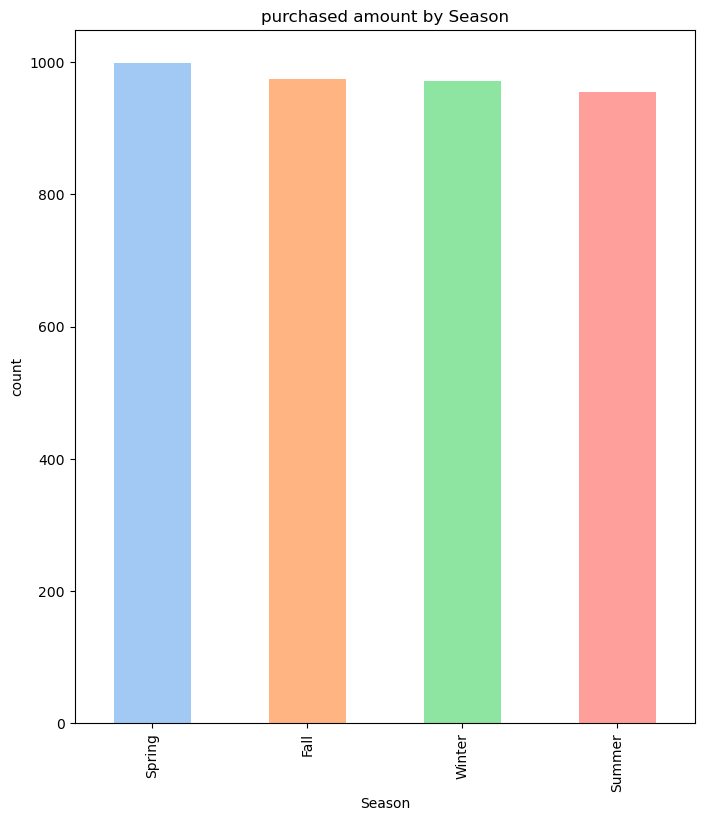

In [19]:
plt.figure(figsize=(8,9))
Season_counts.plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xlabel("Season")
plt.ylabel('count')
plt.title('purchased amount by Season')
plt.show()

In [22]:
size_counts = data['Size'].value_counts()
size_counts

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

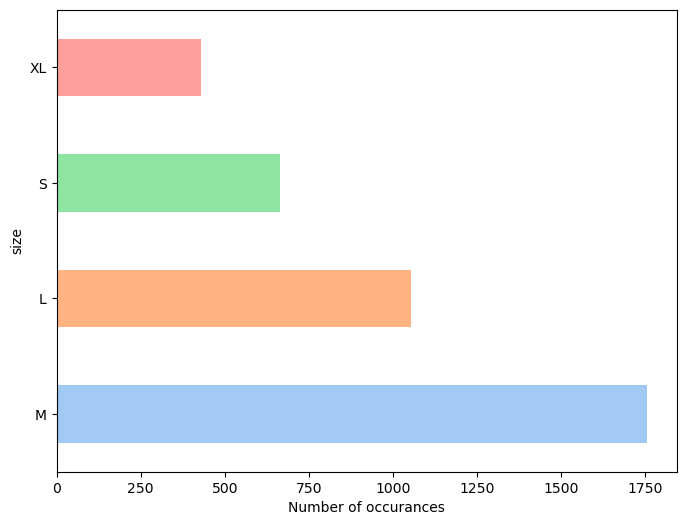

In [24]:
plt.figure(figsize=(8,6))
size_counts.plot(kind = 'barh', color = sns.color_palette('pastel'))
plt.xlabel('Number of occurances')
plt.ylabel('size')
plt.show()

In [25]:
review_counts = data['Review_Rating'].value_counts()
review_counts

3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review_Rating, dtype: int64

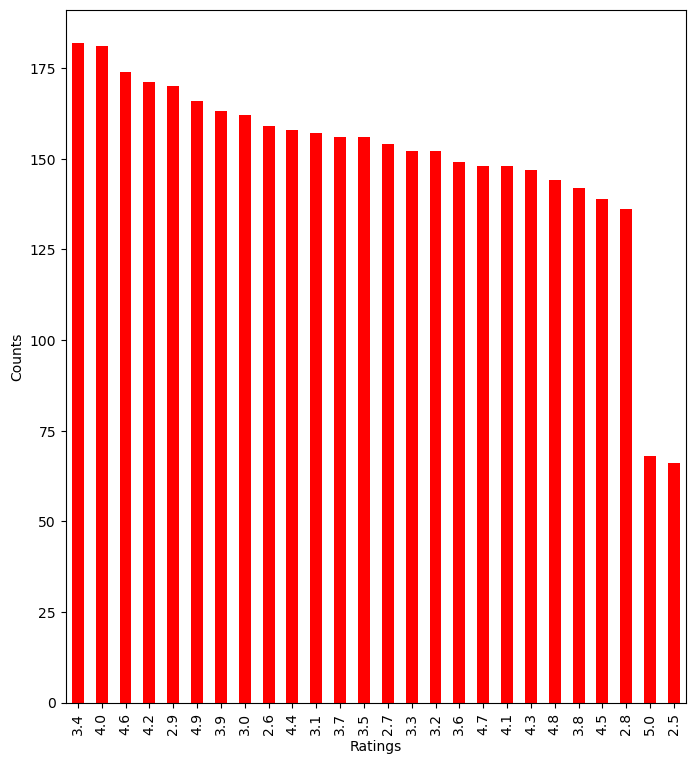

In [26]:
plt.figure(figsize=(8,9))
review_counts.plot(kind= 'bar', color = 'Red')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

In [36]:
color_counts = data['Color'].value_counts()
color_counts

Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Color, dtype: int64

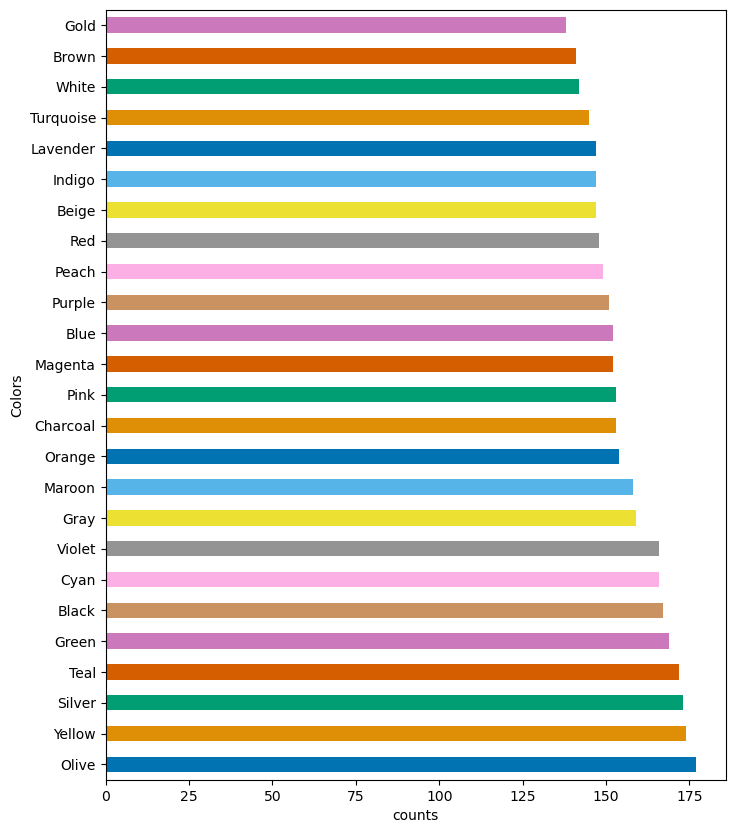

In [37]:
plt.figure(figsize=(8,10))
color_counts.plot(kind = 'barh', color = sns.color_palette('colorblind'))
plt.xlabel('counts')
plt.ylabel('Colors')
plt.show()

In [40]:
shipp = data['ShippingType'].value_counts()
shipp

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: ShippingType, dtype: int64

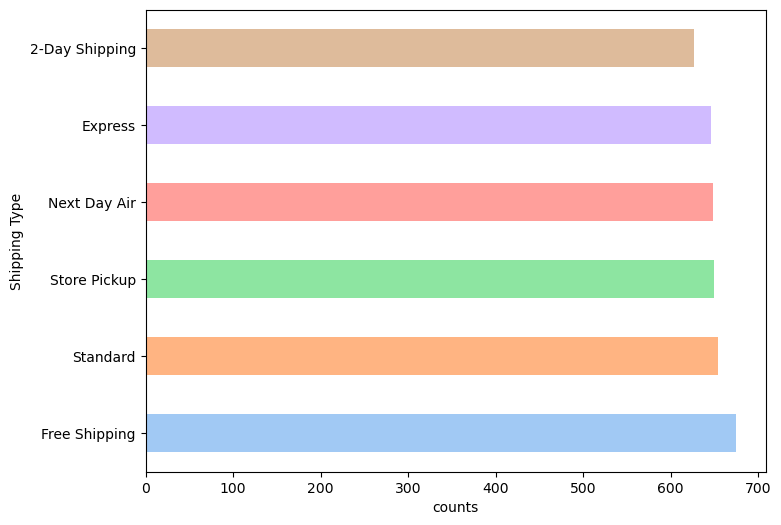

In [42]:
plt.figure(figsize=(8,6))
shipp.plot(kind = 'barh', color = sns.color_palette('pastel'))
plt.xlabel('counts')
plt.ylabel('Shipping Type')
plt.show()

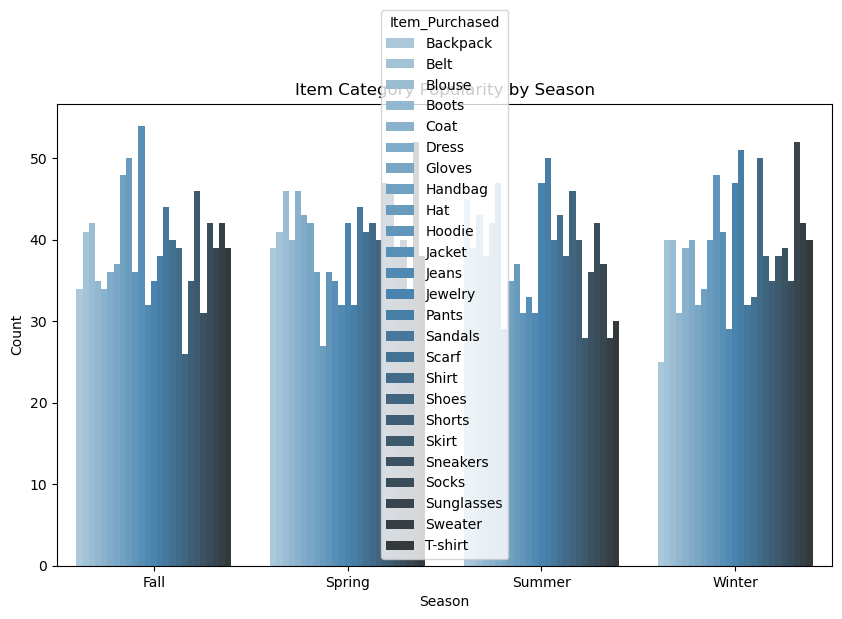

In [3]:
seasonal_item_counts = data.groupby(['Season', 'Item_Purchased']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='Count',  data=seasonal_item_counts, palette='Blues_d', hue='Item_Purchased')

plt.title('Item Category Popularity by Season')
plt.xticks(rotation=0)
plt.show()

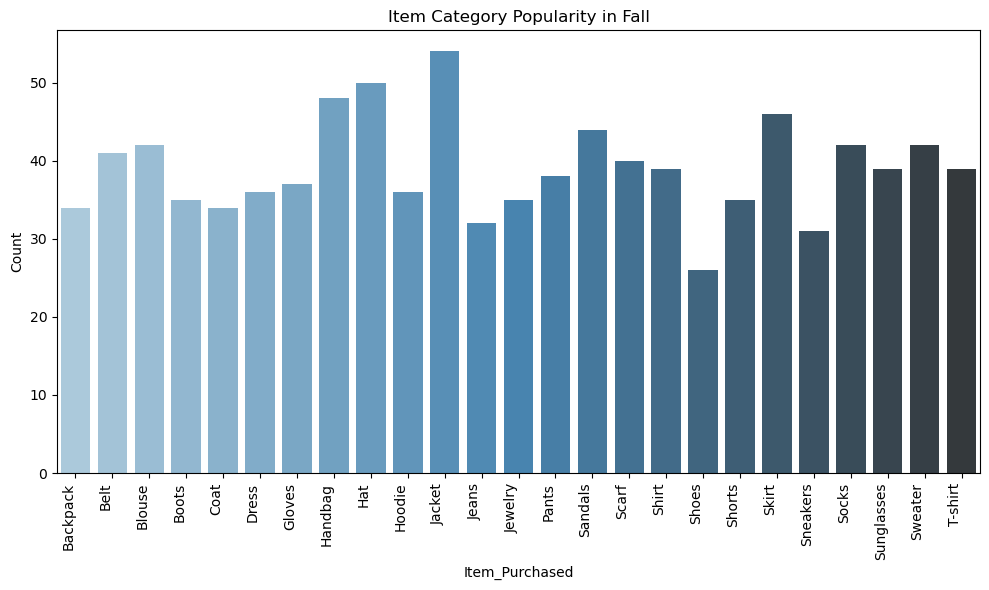

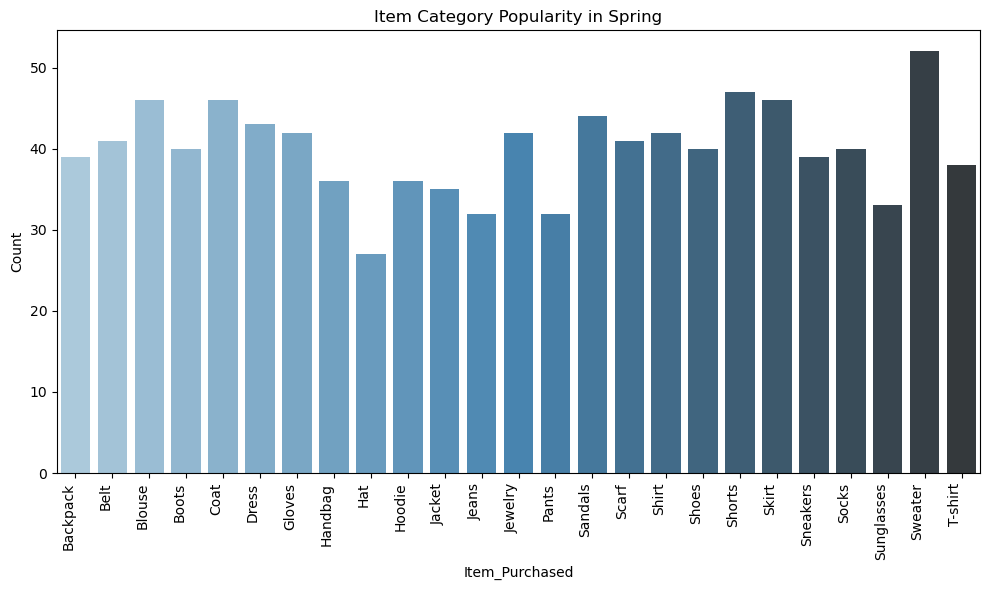

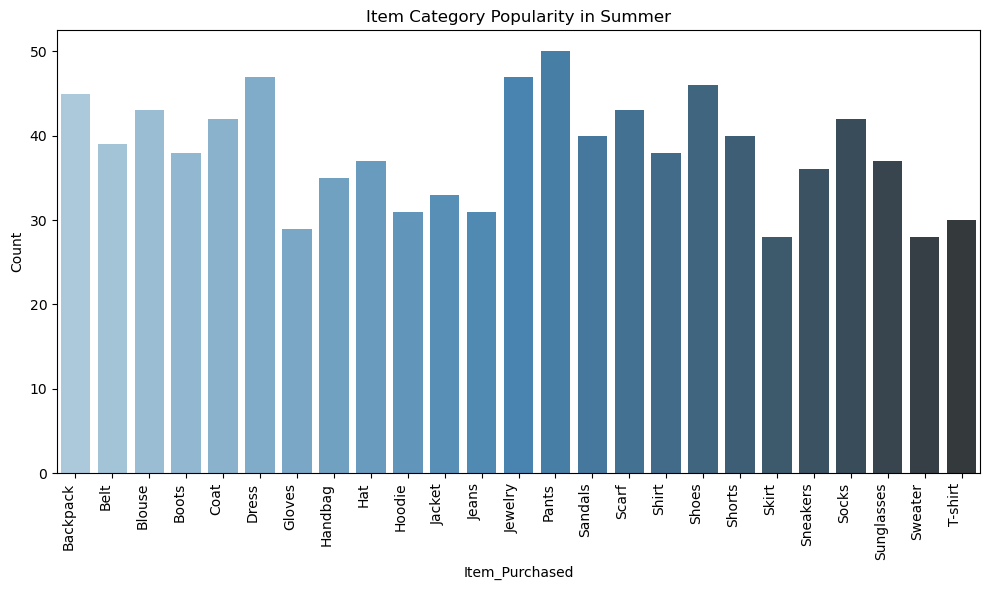

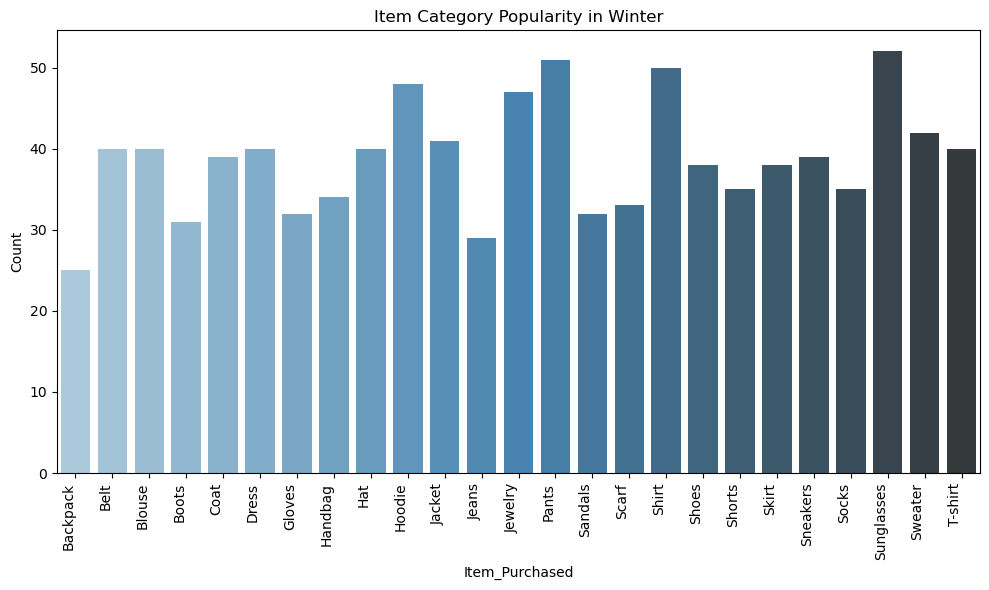

In [5]:
seasons = seasonal_item_counts['Season'].unique()

for season in seasons:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Item_Purchased', y='Count', data=seasonal_item_counts[seasonal_item_counts['Season'] == season], palette='Blues_d')
    ax.set_title(f'Item Category Popularity in {season}')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()

plt.show()

In [7]:
payment_counts = data['PaymentMethod'].value_counts()
payment_counts

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: PaymentMethod, dtype: int64

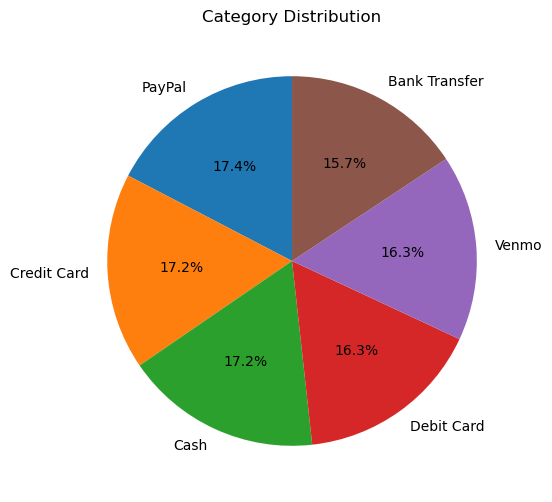

In [12]:

plt.figure(figsize=(8,6))
plt.pie(payment_counts, labels = payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')
plt.show()

In [4]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data

,Customer ID,Age,Gender,Item_Purchased,Category,PurchaseAmount(USD),Location,Size,Color,Season,Review_Rating,Subscription Status,ShippingType,Discount Applied,Promo Code Used,PreviousPurchases,PaymentMethod,Frequency_of_Purchases,Age_Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,51-60
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0-20
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,51-60
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,21-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,41-50
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,51-60
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,41-50
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,41-50


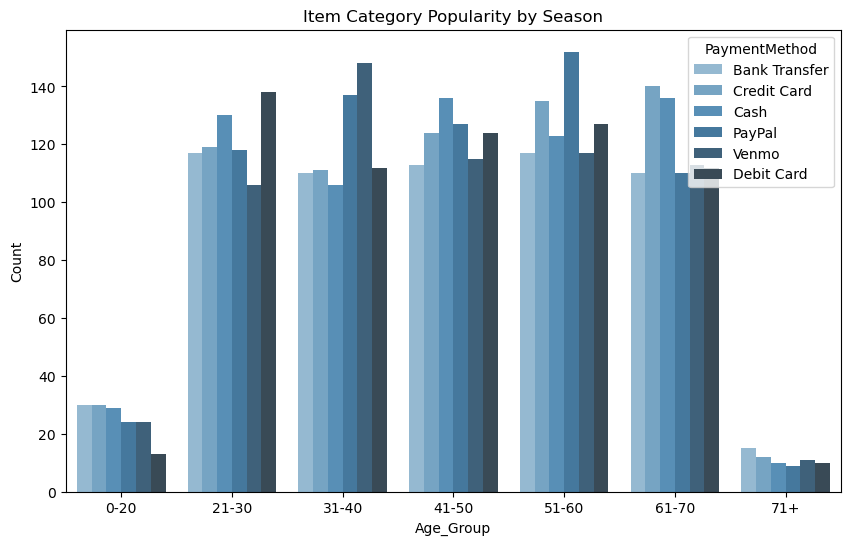

In [24]:
payment_age = data.groupby('Age_Group')['PaymentMethod'].value_counts().reset_index(name='Count')


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Age_Group', y='Count',  data=payment_age, palette='Blues_d', hue='PaymentMethod')

plt.title('Item Category Popularity by Season')
plt.xticks(rotation=0)
plt.show()

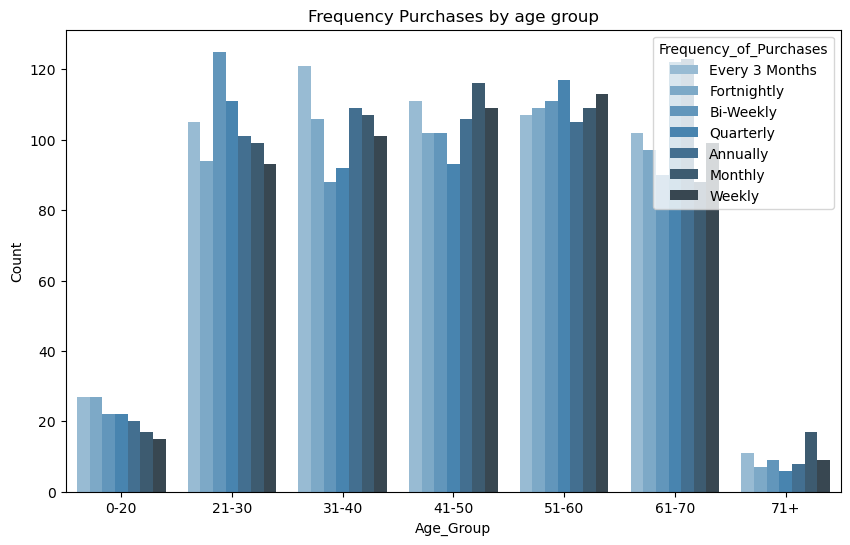

In [26]:
purchases = data.groupby('Age_Group')['Frequency_of_Purchases'].value_counts().reset_index(name = 'Count')
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'Age_Group', y = 'Count', data = purchases, palette = 'Blues_d', hue = 'Frequency_of_Purchases')
plt.title('Frequency Purchases by age group')
plt.xticks(rotation=0)
plt.show()

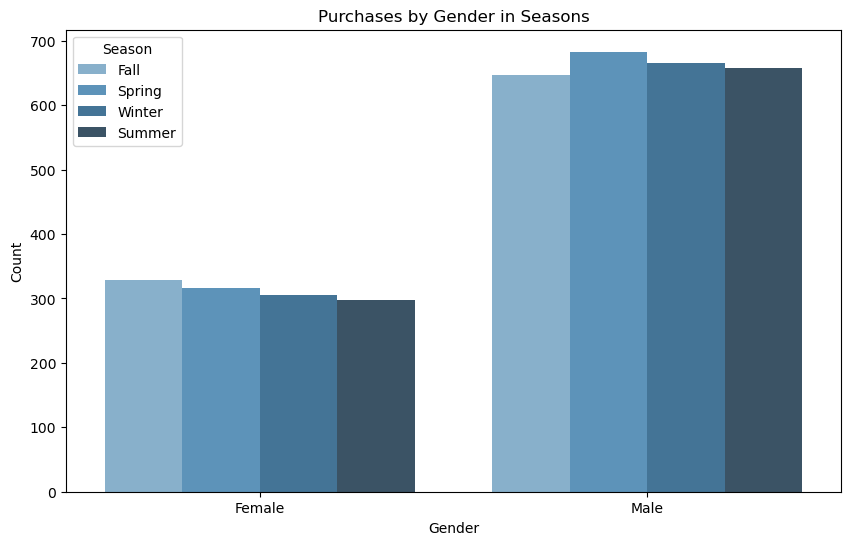

In [2]:
purchases = data.groupby('Gender')['Season'].value_counts().reset_index(name = 'Count')
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'Gender', y = 'Count', data = purchases, palette = 'Blues_d', hue = 'Season')
plt.title('Purchases by Gender in Seasons')
plt.xticks(rotation=0)
plt.show()

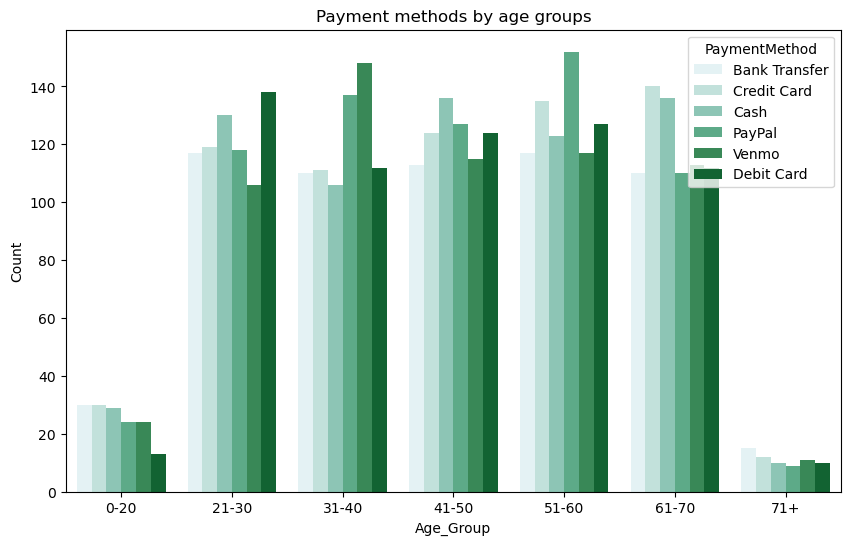

In [8]:
purchases = data.groupby('Age_Group')['PaymentMethod'].value_counts().reset_index(name = 'Count')
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'Age_Group', y = 'Count', data = purchases, palette = 'BuGn', hue = 'PaymentMethod')
plt.title('Payment methods by age groups')
plt.xticks(rotation=0)
plt.show()